In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt


Using TensorFlow backend.
/home/avinash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/avinash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/avinash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/avinash/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
from keras.layers import*
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 66s 6us/step


In [5]:
X_train = (X_train.astype("float32")-127.5)/127.5

In [6]:
total_epochs = 50
batch_size = 256
no_of_batches = X_train.shape[0]//batch_size
half_batch = 128
noise_dim = 100
adam =  Adam(lr=2e-4,beta_1=0.5)

In [7]:
generator = Sequential()
generator.add(Dense(256,input_shape = (noise_dim,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation="tanh"))
generator.compile(loss="binary_crossentropy",optimizer=adam)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)              

In [8]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy",optimizer=adam)
discriminator.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
__________________________

In [9]:
# create a GAN
discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
generate_img = generator(gan_input)
gan_output = discriminator(generate_img)

#functional api

model = Model(inputs = gan_input,outputs = gan_output)
model.compile(loss="binary_crossentropy",optimizer = adam)

In [10]:
X_train = X_train.reshape(-1,784)

In [11]:
X_train.shape

(60000, 784)

In [20]:
def save_images(epoch):
    noise = np.random.normal(0,1,size=(100,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(-1,28,28)
    
    #Display the Images
    plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],cmap='gray',interpolation='nearest')
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    plt.savefig("images/gan_output_{0}.png".format(epoch+1))

In [16]:
import os
#os.mkdir("images")
#os.mkdir("model")


Epoch 1 Disc Loss 0.6046 Gen Loss 1.2625


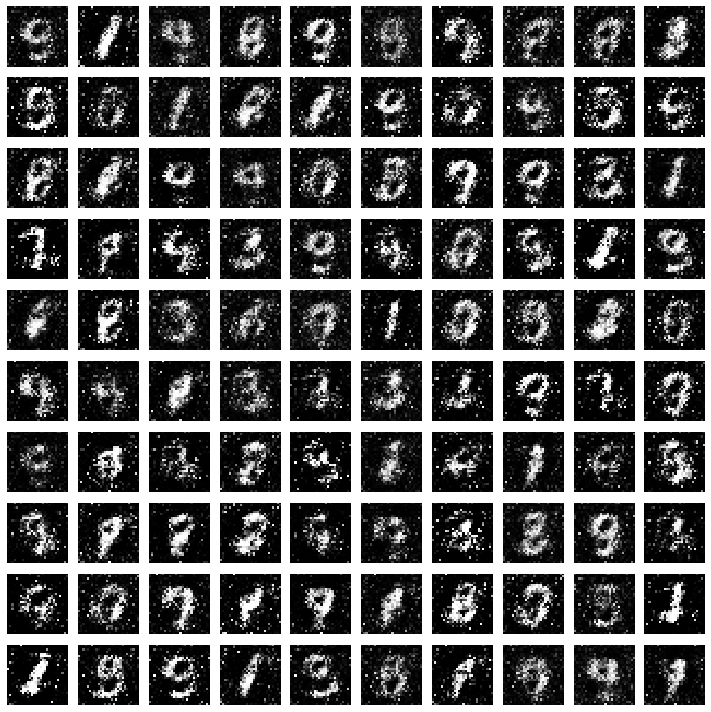

Epoch 2 Disc Loss 0.5727 Gen Loss 1.3667
Epoch 3 Disc Loss 0.5681 Gen Loss 1.3876
Epoch 4 Disc Loss 0.5848 Gen Loss 1.3479
Epoch 5 Disc Loss 0.6118 Gen Loss 1.2122
Epoch 6 Disc Loss 0.6000 Gen Loss 1.2484


<Figure size 432x288 with 0 Axes>

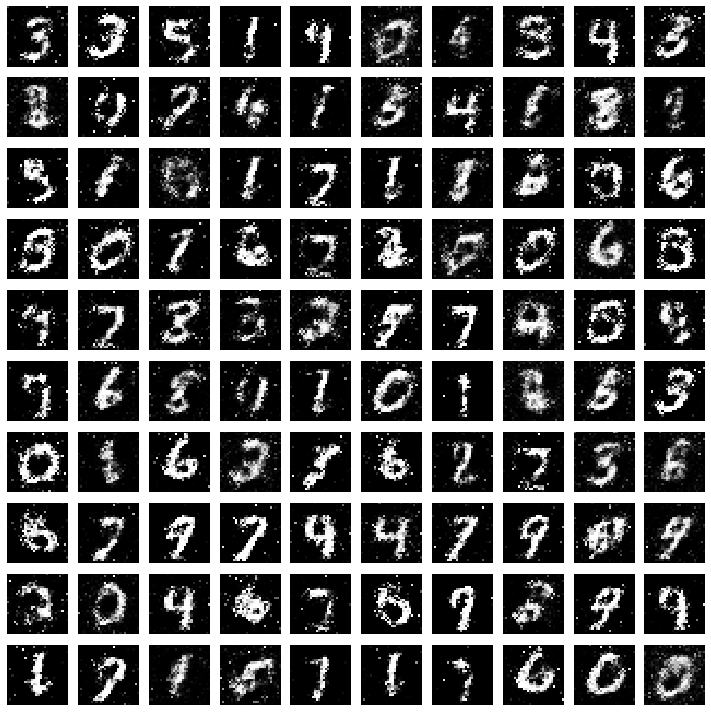

Epoch 7 Disc Loss 0.6319 Gen Loss 1.1214
Epoch 8 Disc Loss 0.6354 Gen Loss 1.0934
Epoch 9 Disc Loss 0.6353 Gen Loss 1.0954
Epoch 10 Disc Loss 0.6308 Gen Loss 1.1162
Epoch 11 Disc Loss 0.6366 Gen Loss 1.1051


<Figure size 432x288 with 0 Axes>

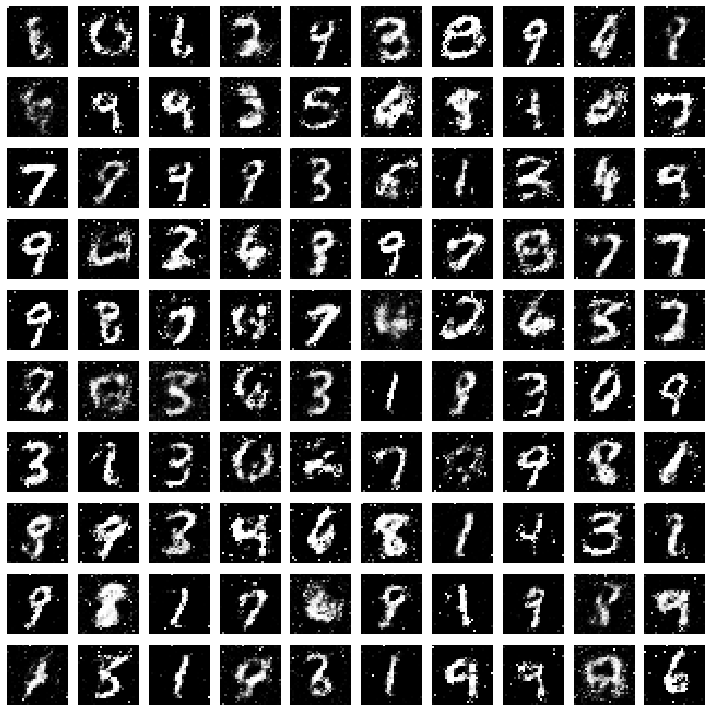

Epoch 12 Disc Loss 0.6382 Gen Loss 1.0984
Epoch 13 Disc Loss 0.6384 Gen Loss 1.0958
Epoch 14 Disc Loss 0.6431 Gen Loss 1.0868
Epoch 15 Disc Loss 0.6420 Gen Loss 1.0849
Epoch 16 Disc Loss 0.6426 Gen Loss 1.0854


<Figure size 432x288 with 0 Axes>

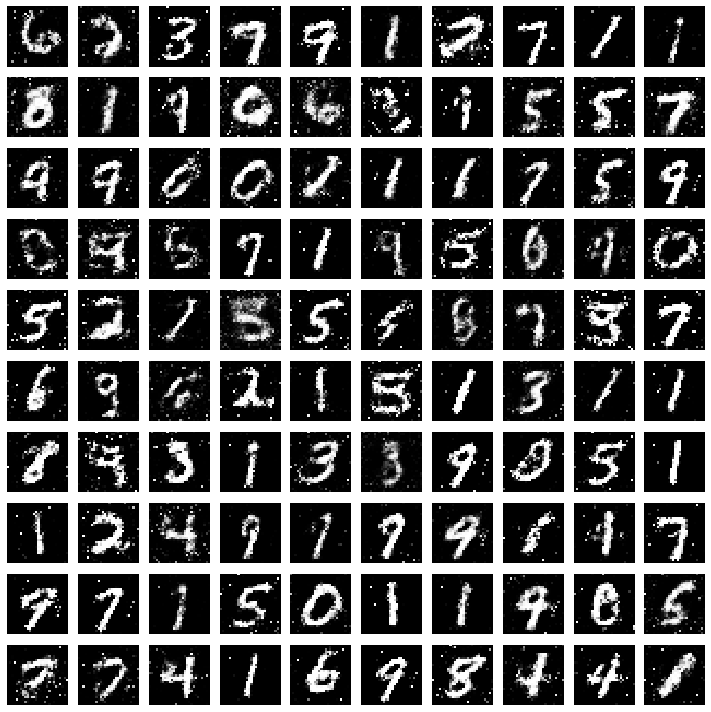

Epoch 17 Disc Loss 0.6461 Gen Loss 1.0708
Epoch 18 Disc Loss 0.6455 Gen Loss 1.0768
Epoch 19 Disc Loss 0.6473 Gen Loss 1.0670
Epoch 20 Disc Loss 0.6454 Gen Loss 1.0736
Epoch 21 Disc Loss 0.6491 Gen Loss 1.0603


<Figure size 432x288 with 0 Axes>

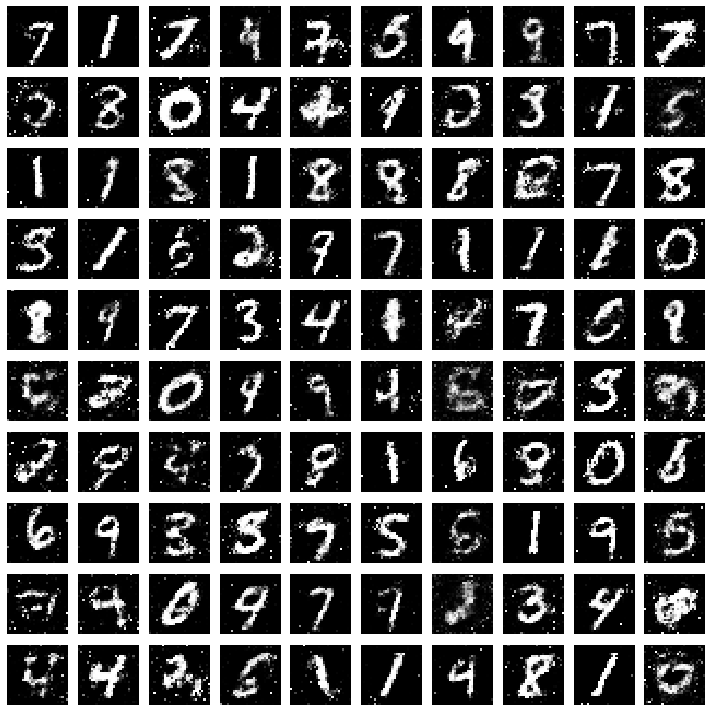

Epoch 22 Disc Loss 0.6482 Gen Loss 1.0593
Epoch 23 Disc Loss 0.6471 Gen Loss 1.0635
Epoch 24 Disc Loss 0.6489 Gen Loss 1.0510
Epoch 25 Disc Loss 0.6476 Gen Loss 1.0589
Epoch 26 Disc Loss 0.6491 Gen Loss 1.0489


<Figure size 432x288 with 0 Axes>

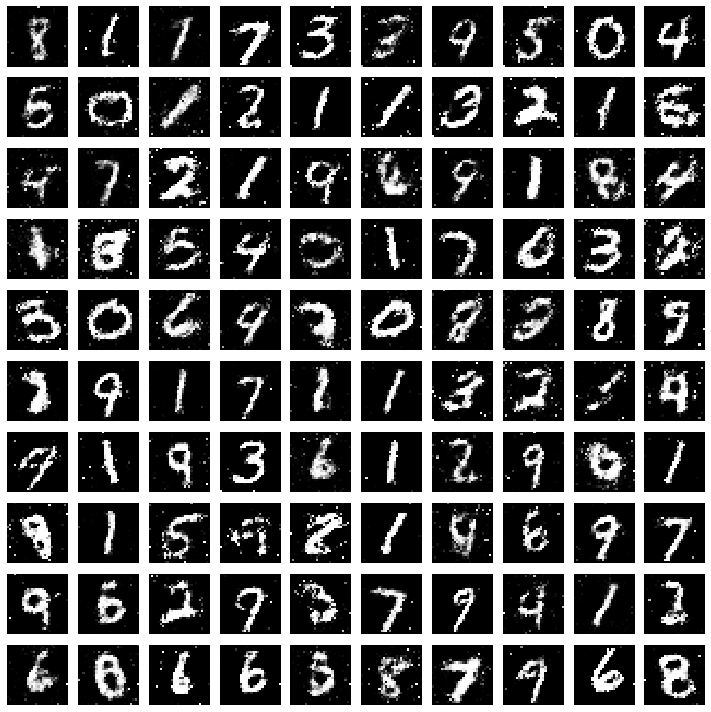

Epoch 27 Disc Loss 0.6488 Gen Loss 1.0583
Epoch 28 Disc Loss 0.6469 Gen Loss 1.0536
Epoch 29 Disc Loss 0.6465 Gen Loss 1.0597
Epoch 30 Disc Loss 0.6493 Gen Loss 1.0473
Epoch 31 Disc Loss 0.6491 Gen Loss 1.0430


<Figure size 432x288 with 0 Axes>

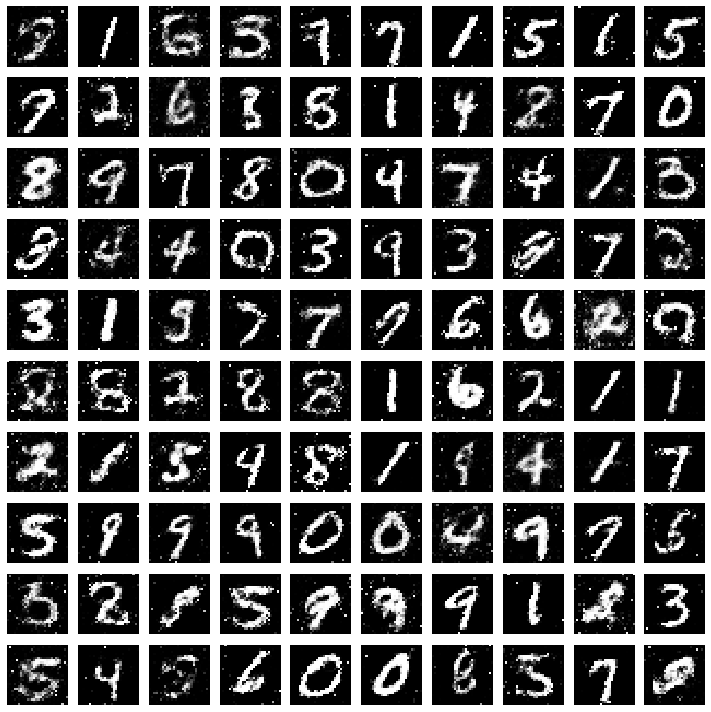

Epoch 32 Disc Loss 0.6480 Gen Loss 1.0493
Epoch 33 Disc Loss 0.6480 Gen Loss 1.0524
Epoch 34 Disc Loss 0.6476 Gen Loss 1.0567
Epoch 35 Disc Loss 0.6495 Gen Loss 1.0459
Epoch 36 Disc Loss 0.6501 Gen Loss 1.0426


<Figure size 432x288 with 0 Axes>

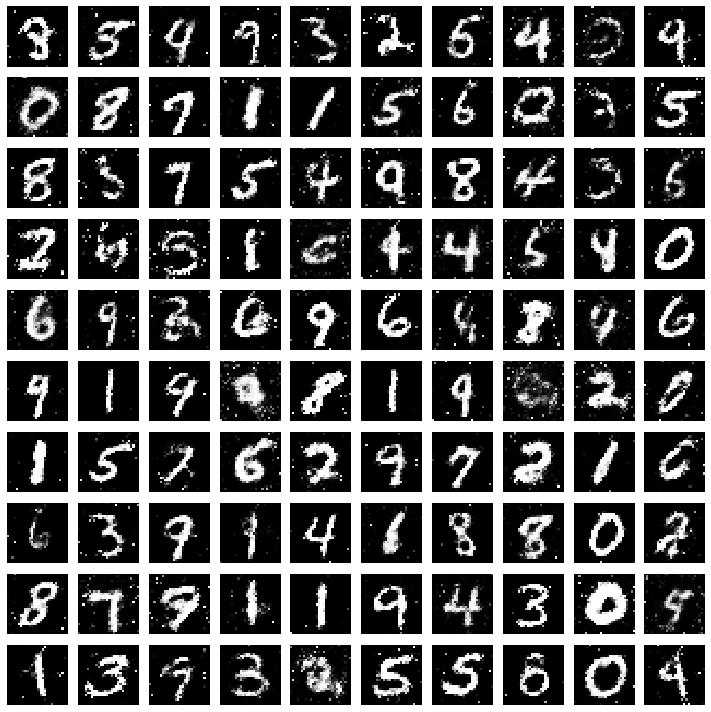

Epoch 37 Disc Loss 0.6497 Gen Loss 1.0416
Epoch 38 Disc Loss 0.6497 Gen Loss 1.0432
Epoch 39 Disc Loss 0.6480 Gen Loss 1.0459
Epoch 40 Disc Loss 0.6500 Gen Loss 1.0415
Epoch 41 Disc Loss 0.6487 Gen Loss 1.0442


<Figure size 432x288 with 0 Axes>

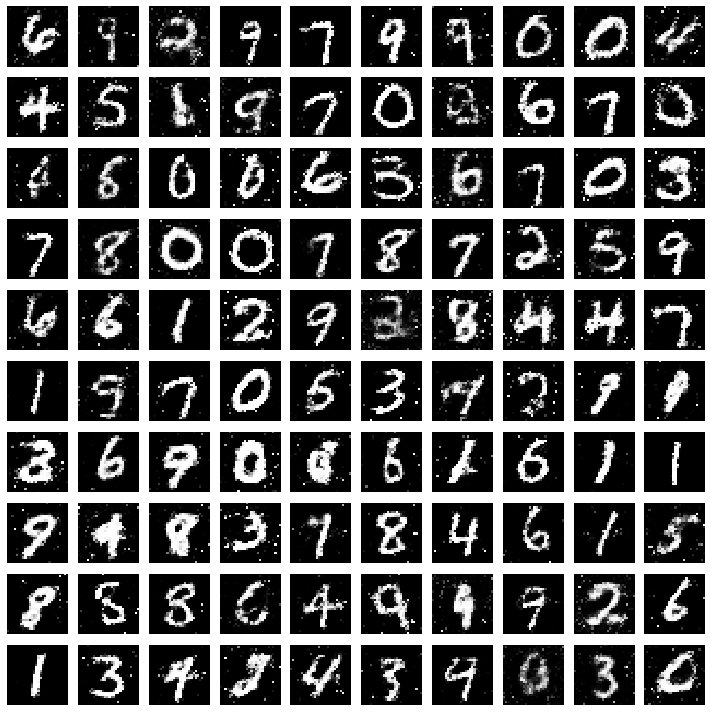

Epoch 42 Disc Loss 0.6476 Gen Loss 1.0475
Epoch 43 Disc Loss 0.6468 Gen Loss 1.0476
Epoch 44 Disc Loss 0.6465 Gen Loss 1.0494
Epoch 45 Disc Loss 0.6441 Gen Loss 1.0528
Epoch 46 Disc Loss 0.6449 Gen Loss 1.0547


<Figure size 432x288 with 0 Axes>

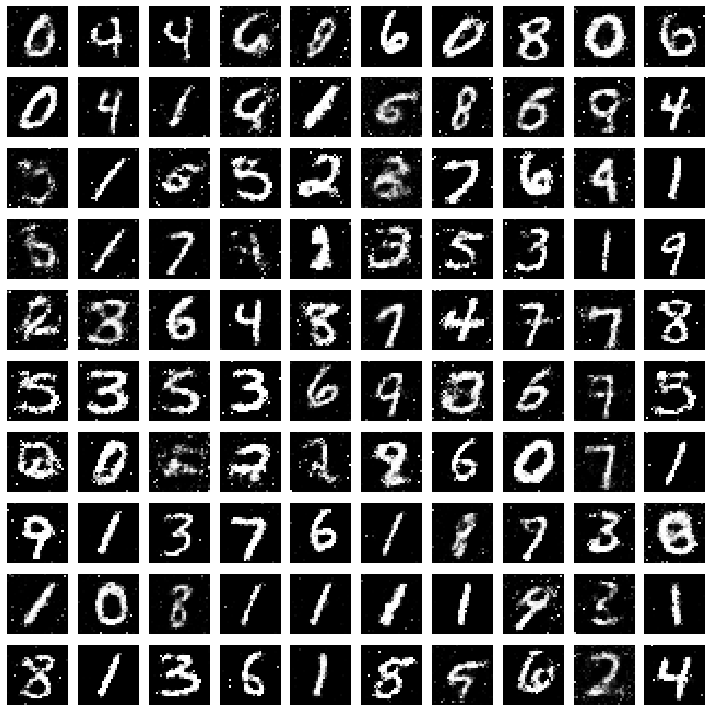

Epoch 47 Disc Loss 0.6439 Gen Loss 1.0534
Epoch 48 Disc Loss 0.6460 Gen Loss 1.0502
Epoch 49 Disc Loss 0.6443 Gen Loss 1.0515
Epoch 50 Disc Loss 0.6435 Gen Loss 1.0579


<Figure size 432x288 with 0 Axes>

In [21]:
discriminator_loss = []
generator_loss = []

for epoch  in range(total_epochs):
  epoch_d_loss = 0.
  epoch_g_loss = 0.

  for batch in range(no_of_batches):
    
    #step 1 train discriminator
    # 50% real data + 50% fake data
    #real data X
    idx = np.random.randint(0,X_train.shape[0],half_batch)
    real_imgs = X_train[idx]
    real_y = np.ones((half_batch,1))*0.9

    #fake data X
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_data = generator.predict(noise)
    fake_y = np.zeros((half_batch,1))

    #train
    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_y)

    d_loss = 0.5*d_loss_fake + 0.5*d_loss_real

    epoch_d_loss += d_loss


    
    #step 2 train generator

    noise = np.random.normal(0,1,size=(batch_size,noise_dim))
    ground_truth_y = np.ones((batch_size,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)

    epoch_g_loss += g_loss

  print("Epoch %d Disc Loss %0.4f Gen Loss %0.4f"%((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))

  discriminator_loss.append(epoch_d_loss)
  generator_loss.append(epoch_g_loss)

  if epoch%5==0:
    generator.save("model/generator_{}.h5".format(epoch+1))
    save_images(epoch)